In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import keras
from keras.layers import Conv2D , Dense ,Activation , MaxPool2D , Input
from keras.models import Model
from keras.utils import to_categorical

In [19]:
ds = pd.read_csv('C:/Users/vikas/Desktop/mljan19dwk/Datasets/mnist/train.csv').values

In [45]:
X_train , X_test , Y_train , Y_test = train_test_split(ds[: , 1:] , ds[: , 0] , test_size=0.25)
print(X_train.shape , X_test.shape , Y_train.shape , Y_test.shape)

(31500, 784) (10500, 784) (31500,) (10500,)


In [46]:
X_train  , X_test = X_train/255 , X_test/255
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
print(X_train.shape , X_test.shape , Y_train.shape , Y_test.shape)

(31500, 784) (10500, 784) (31500, 10) (10500, 10)


In [47]:
def plot_img(n):
    for i in range(n):
        plt.figure()
        plt.title(Y_train[i])
        plt.imshow(X_train[i].reshape(28,28) , cmap='gray')
        plt.show()

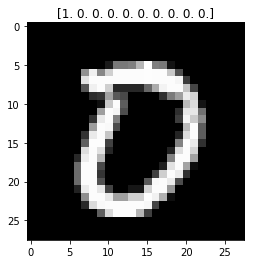

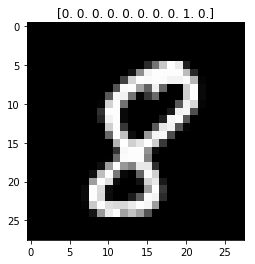

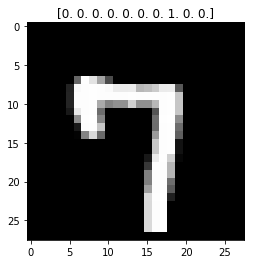

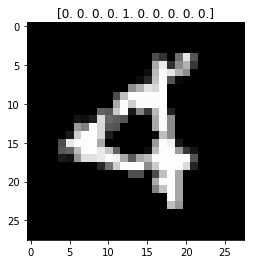

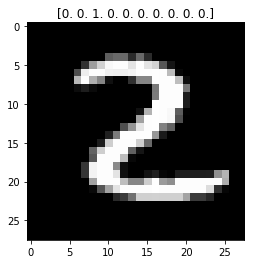

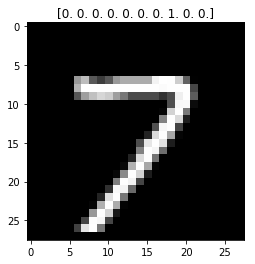

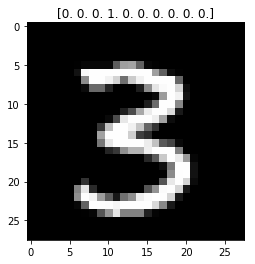

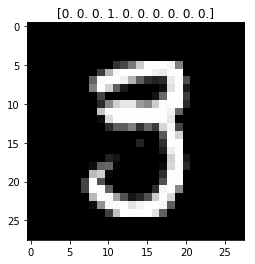

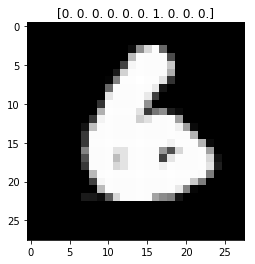

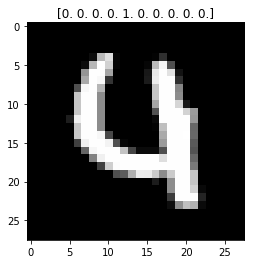

In [48]:
plot_img(10)

## Functional API

In [49]:
inp = Input((784 , ))
fc1 = Dense(256 ,activation='sigmoid')(inp)
fc2 = Dense(64 , activation='sigmoid')(fc1)
out = Dense(10 ,activation='softmax')(fc2)

model = Model(inputs = inp , outputs = out)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_14 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(loss = 'categorical_crossentropy' , optimizer='sgd' , metrics=['accuracy'])

In [51]:
hist = model.fit(X_train,Y_train,
         shuffle=True
         ,epochs=80,
         batch_size=128,
         validation_data=(X_test,Y_test))

Train on 31500 samples, validate on 10500 samples
Epoch 1/80
31500/31500 [==============================] - 1s 45us/step - loss: 2.2964 - acc: 0.1345 - val_loss: 2.2744 - val_acc: 0.1737
Epoch 2/80
31500/31500 [==============================] - 1s 30us/step - loss: 2.2586 - acc: 0.2177 - val_loss: 2.2426 - val_acc: 0.2556
Epoch 3/80
31500/31500 [==============================] - 1s 30us/step - loss: 2.2252 - acc: 0.3392 - val_loss: 2.2076 - val_acc: 0.3784
Epoch 4/80
31500/31500 [==============================] - 1s 30us/step - loss: 2.1871 - acc: 0.4465 - val_loss: 2.1659 - val_acc: 0.3957
Epoch 5/80
31500/31500 [==============================] - 1s 31us/step - loss: 2.1423 - acc: 0.4870 - val_loss: 2.1169 - val_acc: 0.5325
Epoch 6/80
31500/31500 [==============================] - 1s 37us/step - loss: 2.0888 - acc: 0.5584 - val_loss: 2.0593 - val_acc: 0.5443
Epoch 7/80
31500/31500 [==============================] - 1s 31us/step - loss: 2.0246 - acc: 0.5810 - val_loss: 1.9888 - val_acc

31500/31500 [==============================] - 1s 30us/step - loss: 0.3982 - acc: 0.8901 - val_loss: 0.4045 - val_acc: 0.8886
Epoch 61/80
31500/31500 [==============================] - 1s 30us/step - loss: 0.3951 - acc: 0.8906 - val_loss: 0.4014 - val_acc: 0.8891
Epoch 62/80
31500/31500 [==============================] - 1s 30us/step - loss: 0.3920 - acc: 0.8912 - val_loss: 0.3986 - val_acc: 0.8891
Epoch 63/80
31500/31500 [==============================] - 1s 31us/step - loss: 0.3892 - acc: 0.8917 - val_loss: 0.3959 - val_acc: 0.8909
Epoch 64/80
31500/31500 [==============================] - 1s 30us/step - loss: 0.3863 - acc: 0.8924 - val_loss: 0.3934 - val_acc: 0.8912
Epoch 65/80
31500/31500 [==============================] - 1s 30us/step - loss: 0.3836 - acc: 0.8930 - val_loss: 0.3914 - val_acc: 0.8923
Epoch 66/80
31500/31500 [==============================] - 1s 33us/step - loss: 0.3811 - acc: 0.8937 - val_loss: 0.3880 - val_acc: 0.8915
Epoch 67/80
31500/31500 [=====================

In [52]:
hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

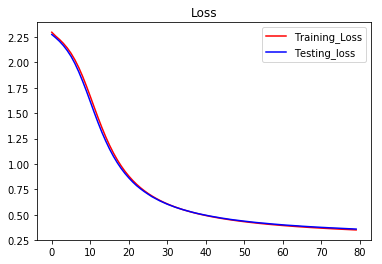

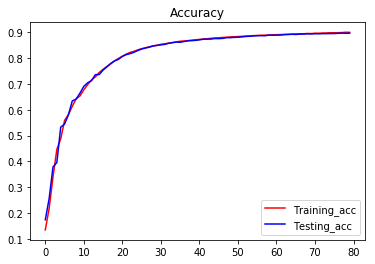

In [53]:
plt.figure()
plt.title("Loss")
plt.plot(hist.history['loss'] , 'r' , label = 'Training_Loss')
plt.plot(hist.history['val_loss'] , 'b' , label = 'Testing_loss')
plt.legend()
plt.show()


plt.figure()
plt.title("Accuracy")
plt.plot(hist.history['acc'] , 'r' , label = 'Training_acc')
plt.plot(hist.history['val_acc'] , 'b' , label = 'Testing_acc')
plt.legend()
plt.show()